In [2]:
import pandas as pd
import numpy as np
import h5py

In [3]:
# read in "hand-score" freezeframe data 
freeze_data = pd.read_csv('/Users/novak/Documents/Columbia/mentored_research/Turi/els git/els_project/notebooks/novak_analyses/combined_freezeframe_data.csv')
freeze_data['freeze'] = freeze_data['freeze'].astype(int)
freeze_data.head()

,t(sec),motion_index,freeze,cohort_id,day
0,0.57,122.88,0,ptsd2_91,recall1
1,0.80,186.29,0,ptsd2_91,recall1
2,1.07,393.09,0,ptsd2_91,recall1
3,1.34,215.13,0,ptsd2_91,recall1
4,1.60,125.65,0,ptsd2_91,recall1


In [4]:
# read in moseq data from h5 file 
file_path = '/Users/novak/Documents/Columbia/mentored_research/Turi/els git/els_project/notebooks/novak_analyses/seflb_moseq.h5'

all_data = []

with h5py.File(file_path, 'r') as hdf:
    for group_name in hdf.keys():
        group_data = hdf[group_name]
        
        centroid = group_data['centroid'][:]
        heading = group_data['heading'][:]
        latent_state = group_data['latent_state'][:]
        syllable = group_data['syllable'][:]
        
        df = pd.DataFrame({
            'centroid_x': centroid[:, 0],
            'centroid_y': centroid[:, 1],
            'heading': heading,
            'syllable': syllable
        })
        
        latent_df = pd.DataFrame(latent_state, columns=[f'latent_{i}' for i in range(latent_state.shape[1])])
        df = pd.concat([df, latent_df], axis=1)
        
        df['cohort_id'] = group_name
        
        all_data.append(df)

seflb_moseq = pd.concat(all_data, ignore_index=True)
freeze_syllable = [2]
seflb_moseq['moseq_freeze'] = [1 if x in freeze_syllable else 0 for x in seflb_moseq['syllable']]
seflb_moseq.head()

,centroid_x,centroid_y,heading,syllable,latent_0,latent_1,latent_2,latent_3,cohort_id,moseq_freeze
0,118.586538,161.124835,-0.828954,3,4.136871,-5.659703,-1.588468,-5.847551,ptsd2_91_seflbDLC_resnet50_phi_cfc_boxNov7shuf...,0
1,118.848341,161.603726,1.775721,3,-0.239876,-3.965723,2.790746,4.243270,ptsd2_91_seflbDLC_resnet50_phi_cfc_boxNov7shuf...,0
2,117.683357,161.460085,-3.132504,3,1.029051,0.122408,0.410834,0.637274,ptsd2_91_seflbDLC_resnet50_phi_cfc_boxNov7shuf...,0
3,116.916169,158.646316,2.660140,3,3.249667,-1.257757,-10.119437,0.538984,ptsd2_91_seflbDLC_resnet50_phi_cfc_boxNov7shuf...,0
4,116.105859,155.849867,2.409013,3,3.010539,-1.450612,-9.982424,0.628398,ptsd2_91_seflbDLC_resnet50_phi_cfc_boxNov7shuf...,0


In [9]:
# read in moseq data from h5 file 
file_path = '/Users/novak/Documents/Columbia/mentored_research/Turi/els git/els_project/notebooks/novak_analyses/recall1_moseq.h5'

all_data = []

with h5py.File(file_path, 'r') as hdf:
    for group_name in hdf.keys():
        group_data = hdf[group_name]
        
        centroid = group_data['centroid'][:]
        heading = group_data['heading'][:]
        latent_state = group_data['latent_state'][:]
        syllable = group_data['syllable'][:]
        
        df = pd.DataFrame({
            'centroid_x': centroid[:, 0],
            'centroid_y': centroid[:, 1],
            'heading': heading,
            'syllable': syllable
        })
        
        latent_df = pd.DataFrame(latent_state, columns=[f'latent_{i}' for i in range(latent_state.shape[1])])
        df = pd.concat([df, latent_df], axis=1)
        
        df['cohort_id'] = group_name
        
        all_data.append(df)

recall1_moseq = pd.concat(all_data, ignore_index=True)
freeze_syllable = [2]
recall1_moseq['moseq_freeze'] = [1 if x in freeze_syllable else 0 for x in recall1_moseq['syllable']]
recall1_moseq.head()

,centroid_x,centroid_y,heading,syllable,latent_0,latent_1,latent_2,latent_3,cohort_id,moseq_freeze
0,74.070726,111.037201,-0.892421,5,2.240197,-2.391419,1.772341,-0.340401,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,0
1,72.525750,111.047703,0.594167,5,-1.606308,-2.867551,2.032870,-1.531912,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,0
2,69.059280,112.469377,1.871389,5,0.414604,0.421809,0.611039,-0.030958,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,0
3,66.517993,113.140535,2.010186,5,0.331351,0.572764,0.534586,0.075943,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,0
4,67.236058,111.640058,2.072999,5,0.406656,0.353485,0.668646,0.538887,ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7sh...,0


In [5]:
moseq_ptsd2_91_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd2_91_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd2_92_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd2_92_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd3_2_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd3_2_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd3_6_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd3_6_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd4_71_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd4_71_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd4_81_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd4_81_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd5_61_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd5_61_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd5_81_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd5_81_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd6_61_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd6_61_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd6_71_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd6_71_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd9_28_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd9_28-1_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd9_29_seflb = seflb_moseq[seflb_moseq['cohort_id'] == 'ptsd9_29-3_seflbDLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()


In [10]:
moseq_ptsd2_91_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd2_91_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd2_92_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd2_92_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd3_2_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd3_2_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd3_6_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd3_6_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd4_71_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd4_71_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd4_81_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd4_81_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd5_61_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd5_61_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd5_81_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd5_81_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd6_61_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd6_61_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd6_71_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd6_71_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd9_28_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd9_28-1_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()
moseq_ptsd9_29_recall1 = recall1_moseq[recall1_moseq['cohort_id'] == 'ptsd9_29-3_recall1DLC_resnet50_phi_cfc_boxNov7shuffle1_388000'].reset_index()

In [6]:
freeze_ptsd2_91_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd2_91') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd2_91_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd2_91') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd2_92_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd2_92') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd2_92_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd2_92') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd3_2_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd3_2') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd3_2_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd3_2') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd3_6_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd3_6') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd3_6_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd3_6') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd4_71_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd4_71') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd4_71_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd4_71') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd4_81_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd4_81') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd4_81_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd4_81') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd5_61_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd5_61') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd5_61_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd5_61') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd5_81_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd5_81') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd5_81_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd5_81') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd6_61_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd6_61') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd6_61_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd6_61') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd6_71_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd6_71') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd6_71_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd6_71') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd9_28_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd9_28') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd9_28_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd9_28') & (freeze_data['day'] == 'seflb')].reset_index()
freeze_ptsd9_29_recall1 = freeze_data[(freeze_data['cohort_id'] == 'ptsd9_29') & (freeze_data['day'] == 'recall1')].reset_index()
freeze_ptsd9_29_seflb = freeze_data[(freeze_data['cohort_id'] == 'ptsd9_29') & (freeze_data['day'] == 'seflb')].reset_index()


In [7]:
def plot_ethogram_v6(freeze_df, moseq_df, freeze_col='freeze', moseq_col='moseq_freeze', 
                     freeze_label='FreezeFrame', moseq_label='KPMS'):
    """
    Plots an ethogram comparing freeze and moving states between two models with a normalized time axis.
    Uses softer colors and adds dark outlines between each row for clarity.
    
    Parameters:
    - freeze_df: DataFrame containing the FreezeFrame data.
    - moseq_df: DataFrame containing the KPMS data.
    - freeze_col: Column name in freeze_df representing the freeze states (default is 'freeze').
    - moseq_col: Column name in moseq_df representing the freeze states (default is 'moseq_freeze').
    - freeze_label: Label for the FreezeFrame data (default is 'FreezeFrame').
    - moseq_label: Label for the KPMS data (default is 'KPMS').
    """
    import matplotlib.pyplot as plt
    import numpy as np

    freeze_len = len(freeze_df)
    moseq_len = len(moseq_df)

    # Create percentage-based x-axis instead of absolute number of frames 
    freeze_percentage = (freeze_df.index / freeze_len) * 100
    moseq_percentage = (moseq_df.index / moseq_len) * 100

    fig, ax = plt.subplots(figsize=(10, 4))

    moving_color = "#F08080"  
    freeze_color = "#4682B4"  

    # Plot FreezeFrame data
    ax.fill_between(freeze_percentage, 0, 1, color=moving_color, alpha=0.5)
    ax.fill_between(freeze_percentage, 0, 1, where=(freeze_df[freeze_col] == 1), 
                    step='post', color=freeze_color, alpha=0.8)

    # Plot KPMS data
    ax.fill_between(moseq_percentage, 1, 2, color=moving_color, alpha=0.5)
    ax.fill_between(moseq_percentage, 1, 2, where=(moseq_df[moseq_col] == 1), 
                    step='post', color=freeze_color, alpha=0.8)

    # Add black outlines for each row
    for y in [0, 1, 1, 2]:
        ax.plot([0, 100], [y, y], color='black', linewidth=1.5)


    cohort_id = freeze_df['cohort_id'].iloc[0]
    day = freeze_df['day'].iloc[0]

    # Set labels and titles
    ax.set_yticks([0.45, 1.55])
    ax.set_yticklabels([freeze_label, moseq_label])
    ax.set_xlabel("Time (%)")
    ax.set_title("Ethogram {}: {} vs {}".format(cohort_id + " " + day, freeze_label, moseq_label))

    plt.tight_layout()
    plt.show()



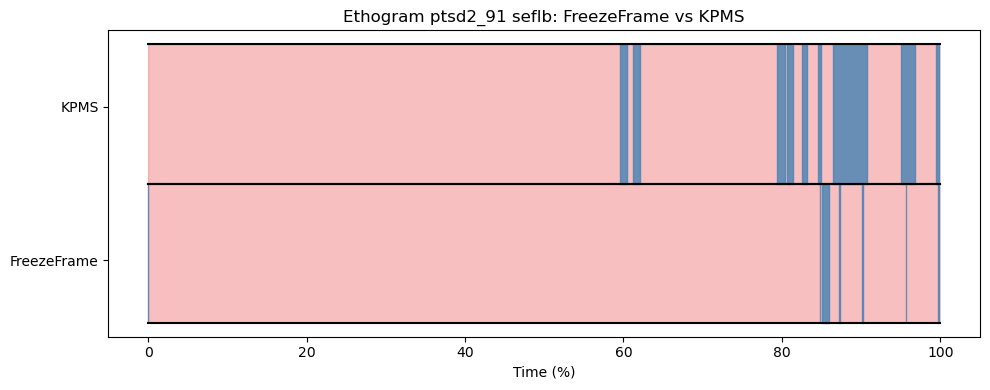

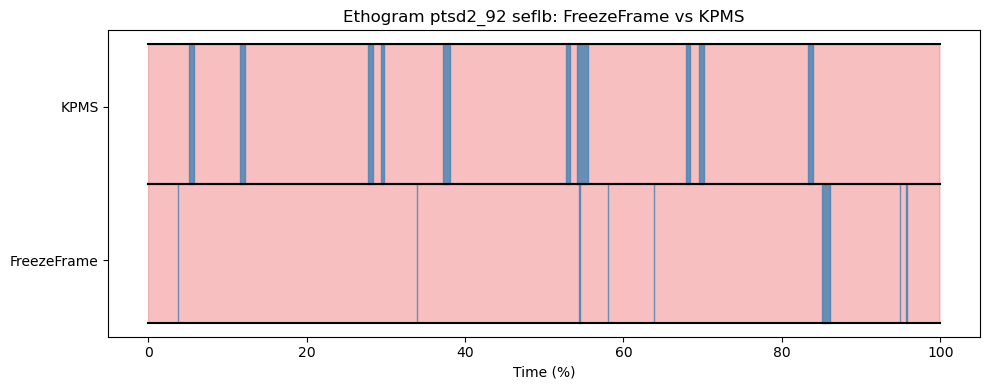

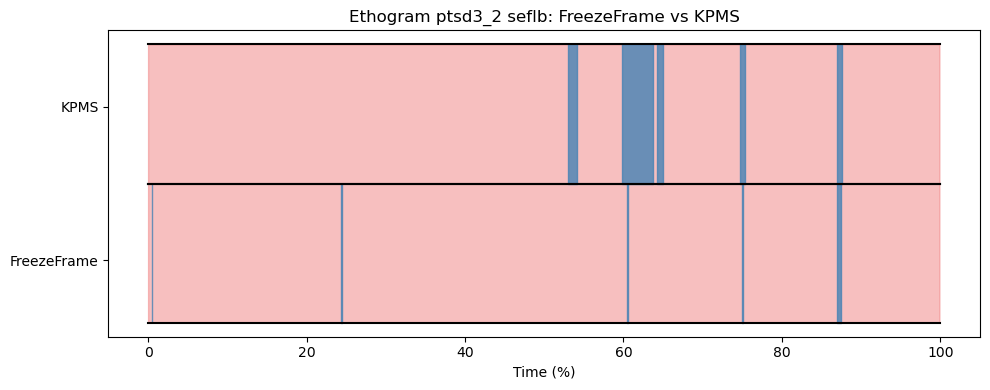

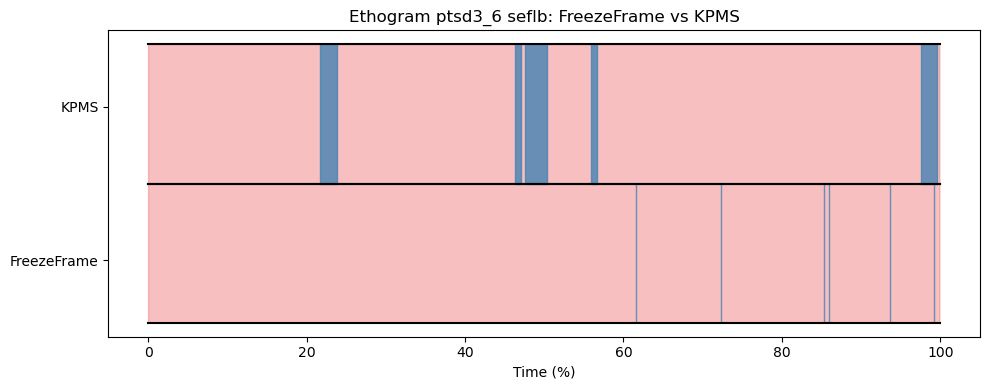

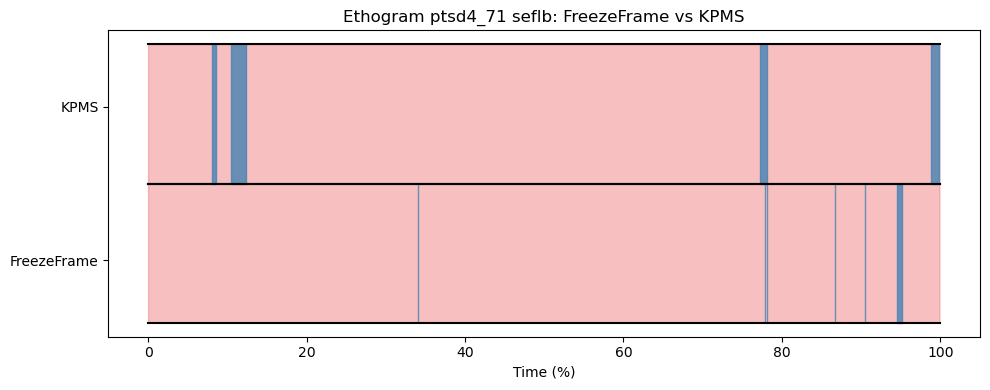

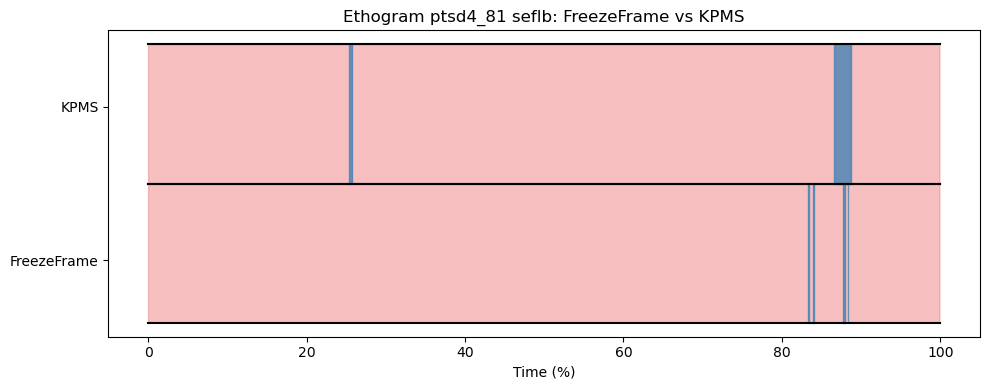

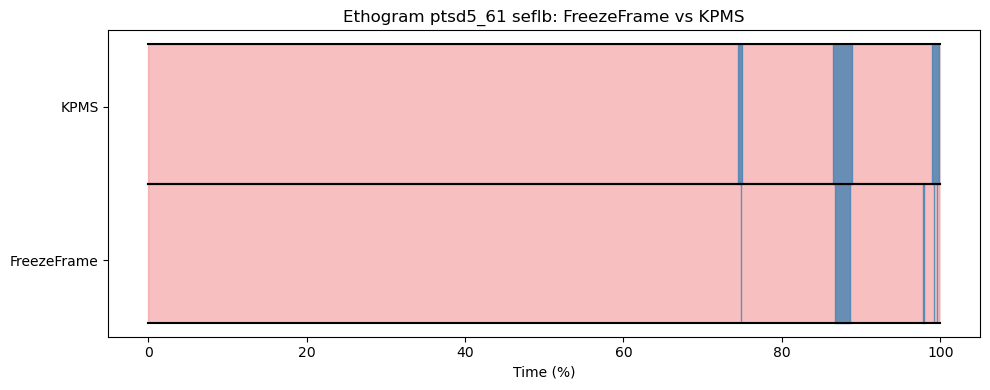

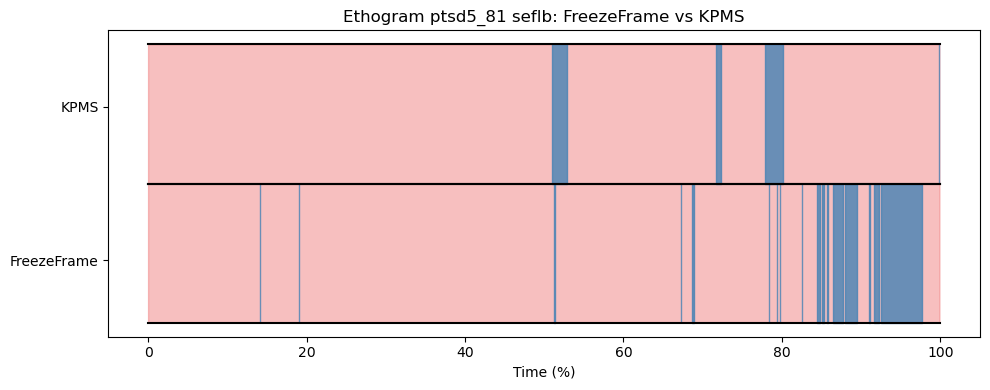

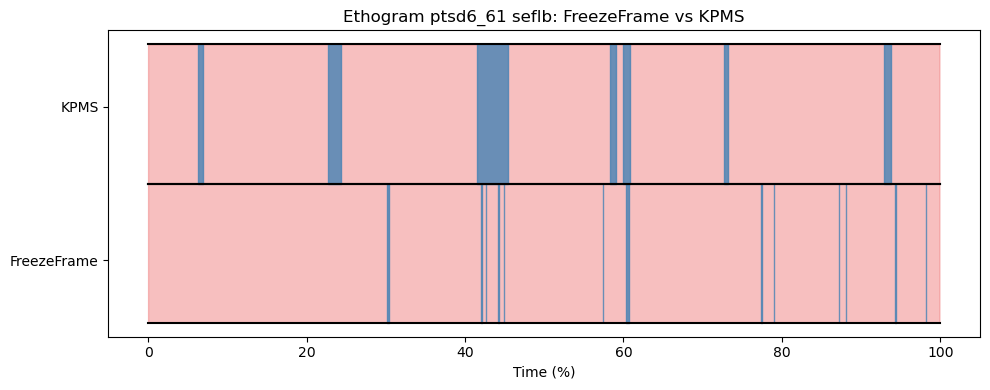

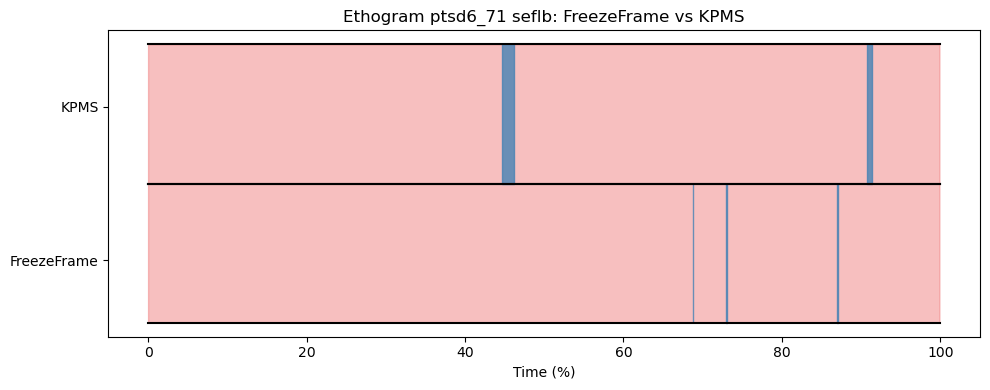

In [8]:
plot_ethogram_v6(freeze_ptsd2_91_seflb, moseq_ptsd2_91_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd2_92_seflb, moseq_ptsd2_92_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd3_2_seflb, moseq_ptsd3_2_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd3_6_seflb, moseq_ptsd3_6_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd4_71_seflb, moseq_ptsd4_71_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd4_81_seflb, moseq_ptsd4_81_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd5_61_seflb, moseq_ptsd5_61_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd5_81_seflb, moseq_ptsd5_81_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd6_61_seflb, moseq_ptsd6_61_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd6_71_seflb, moseq_ptsd6_71_seflb, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')

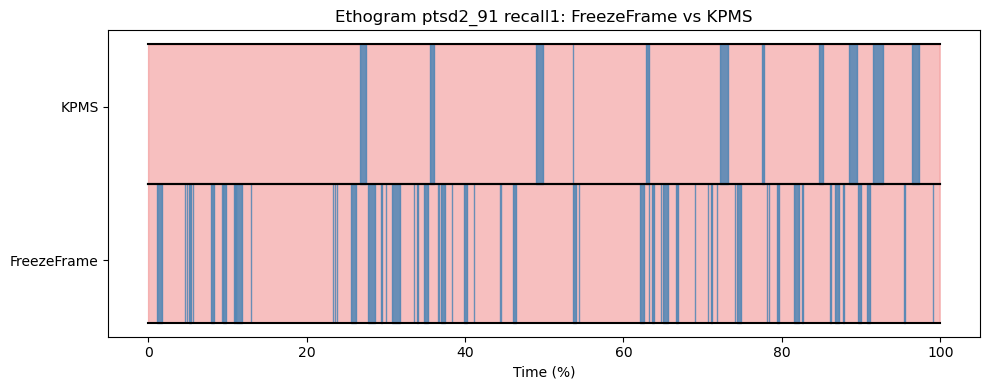

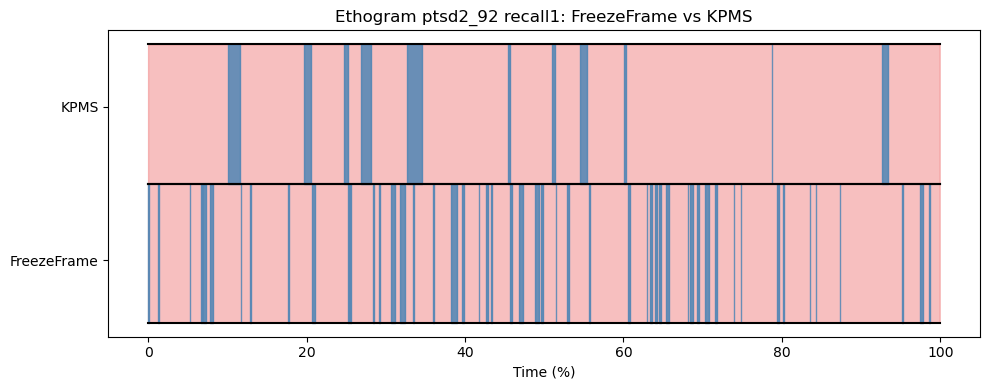

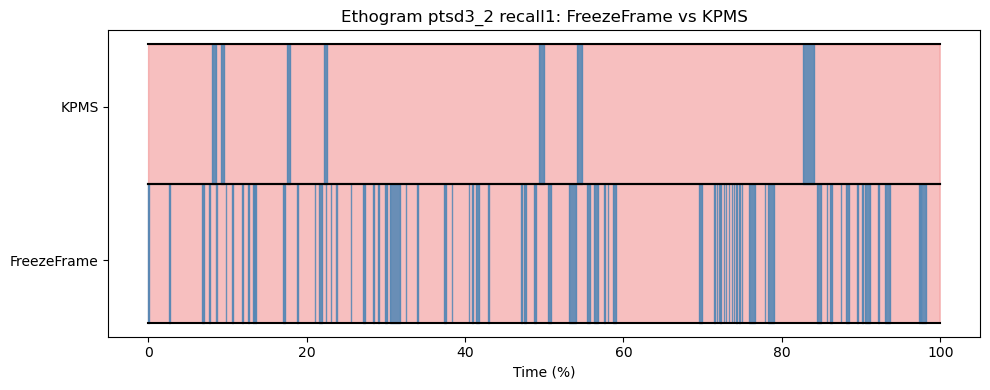

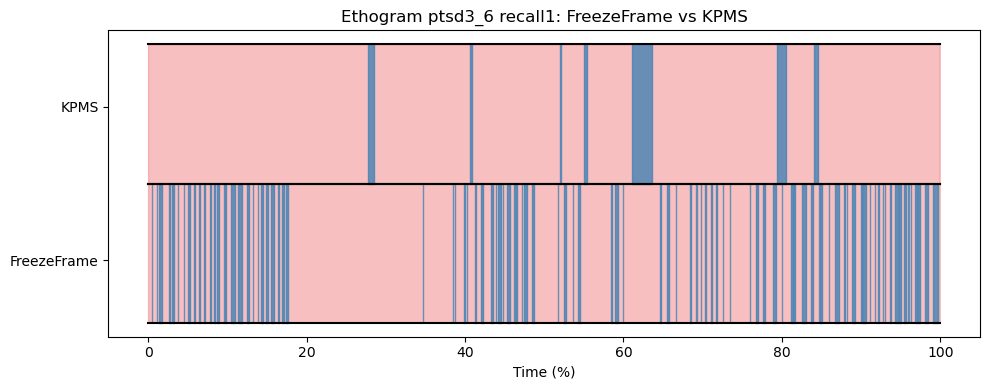

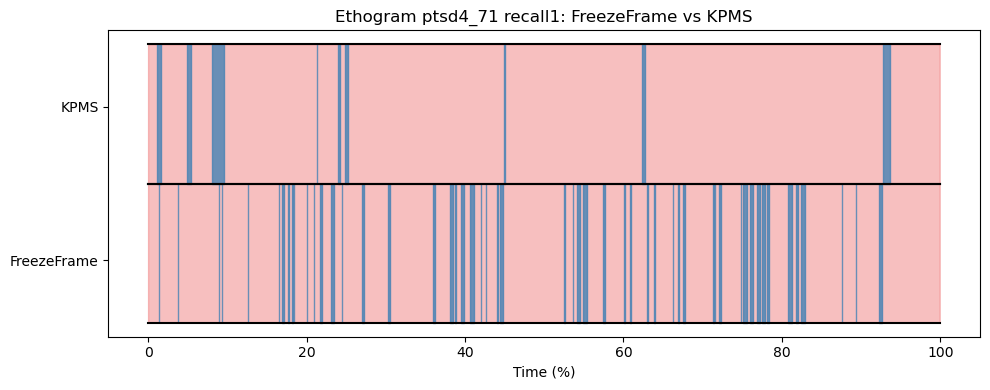

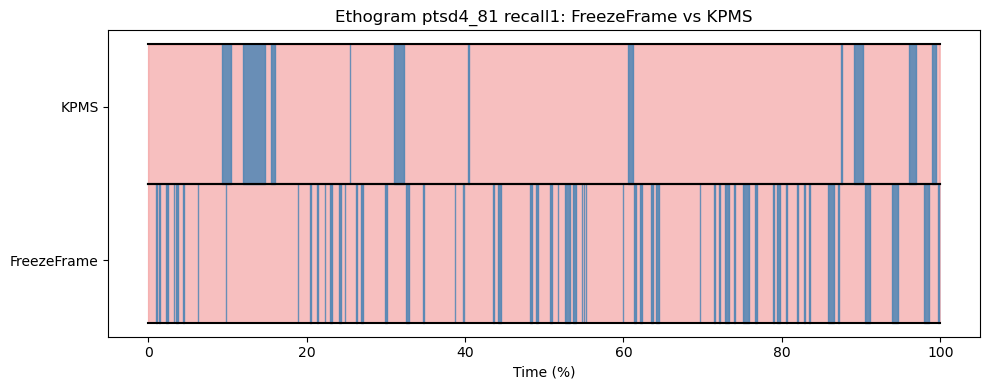

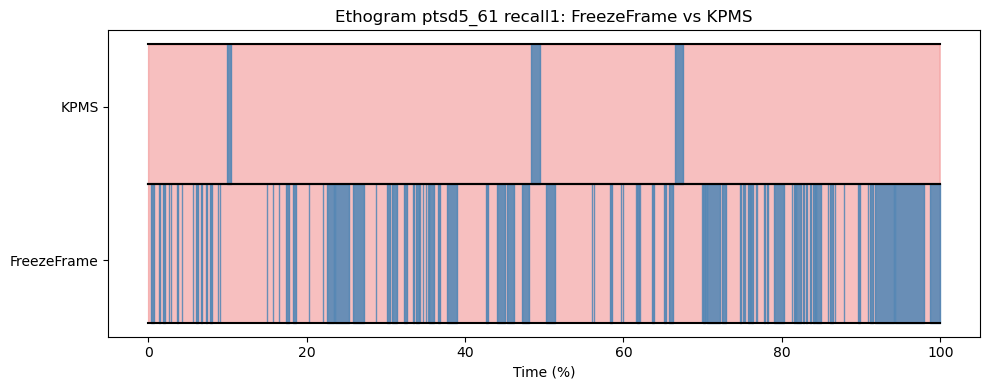

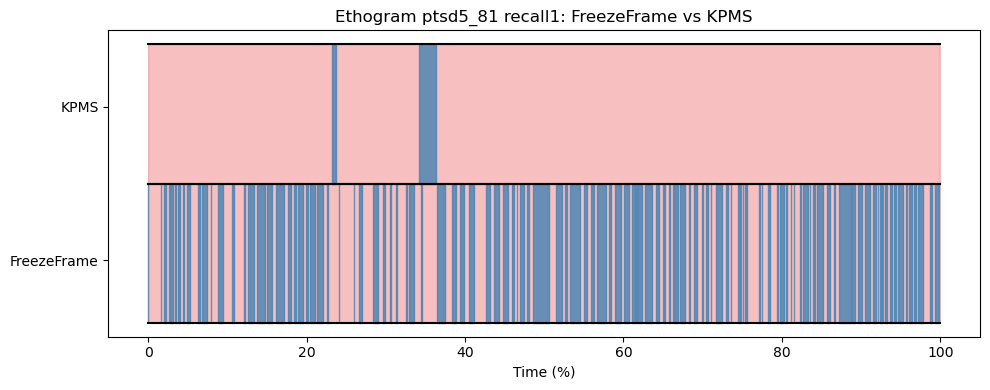

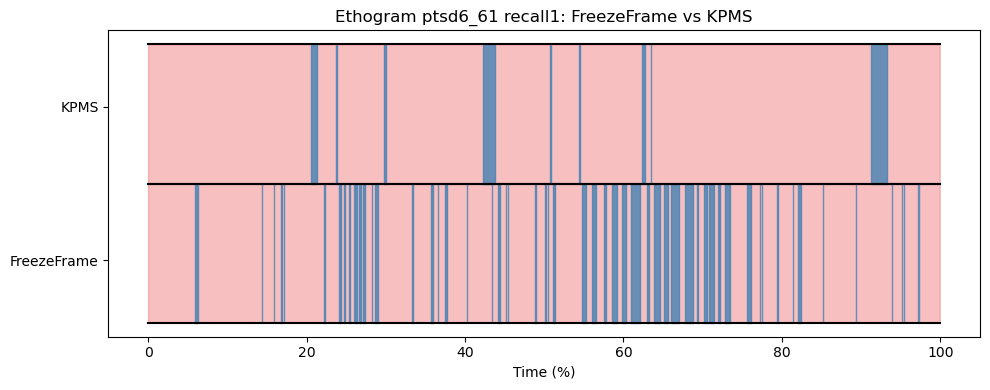

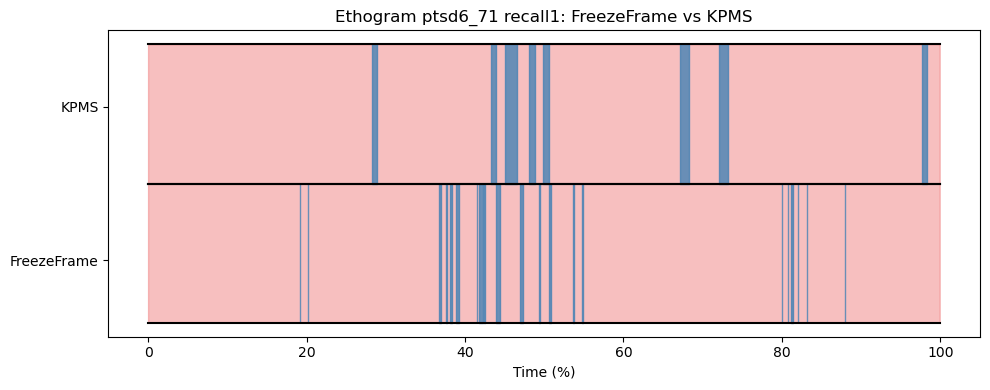

In [11]:
plot_ethogram_v6(freeze_ptsd2_91_recall1, moseq_ptsd2_91_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd2_92_recall1, moseq_ptsd2_92_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd3_2_recall1, moseq_ptsd3_2_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd3_6_recall1, moseq_ptsd3_6_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd4_71_recall1, moseq_ptsd4_71_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd4_81_recall1, moseq_ptsd4_81_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd5_61_recall1, moseq_ptsd5_61_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd5_81_recall1, moseq_ptsd5_81_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd6_61_recall1, moseq_ptsd6_61_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
plot_ethogram_v6(freeze_ptsd6_71_recall1, moseq_ptsd6_71_recall1, freeze_col='freeze', moseq_col='moseq_freeze', freeze_label='FreezeFrame', moseq_label='KPMS')
